## Plot of Cext curves and peak extractions

We will plot extinction cross section across the wavelengths for each aspect ratio case (1-7).

In [1]:
import numpy
from scipy.signal import argrelextrema
from matplotlib import pyplot, rcParams
%matplotlib inline


In [2]:
#Set font style and size 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 20
rcParams['axes.linewidth'] = 1

In [3]:
AR_dict = dict()   
AR_22_dict = dict()

for i in range(1,8):
    file_name = f'iso_pillar_AR_{i}_800-1000cm-1_in_ang.txt'
    file_name_22 = f'iso_pillar_AR_{i}_22deg_800-1000cm-1_in_ang.txt'
    
    w, cext = numpy.loadtxt('results_data/iso_pillar_AR/'+file_name, skiprows=1, unpack=True)
    w_22, cext_22 = numpy.loadtxt('results_data/iso_pillar_AR_22deg/'+file_name_22, skiprows=1, unpack=True)

    AR_dict[f'AR_{i}'] = {'w': 1/(w*1e-8), 'cext': cext,
                         'cext_maxs_idx': argrelextrema(cext, numpy.greater)[0],
                         'cext_maxs_nm2': cext[argrelextrema(cext, numpy.greater)[0]],
                         'w_maxs_ang': w[argrelextrema(cext, numpy.greater)[0]], 
                         'w_maxs_cm-1': 1/(w[argrelextrema(cext, numpy.greater)[0]]*1e-8)}
  
    AR_22_dict[f'AR_{i}'] = {'w': 1/(w_22*1e-8), 'cext': cext_22,
                         'cext_maxs_idx': argrelextrema(cext_22, numpy.greater)[0],
                         'cext_maxs_nm2': cext_22[argrelextrema(cext_22, numpy.greater)[0]],
                         'w_maxs_ang': w_22[argrelextrema(cext_22, numpy.greater)[0]], 
                         'w_maxs_cm-1': 1/(w_22[argrelextrema(cext_22, numpy.greater)[0]]*1e-8)}
    

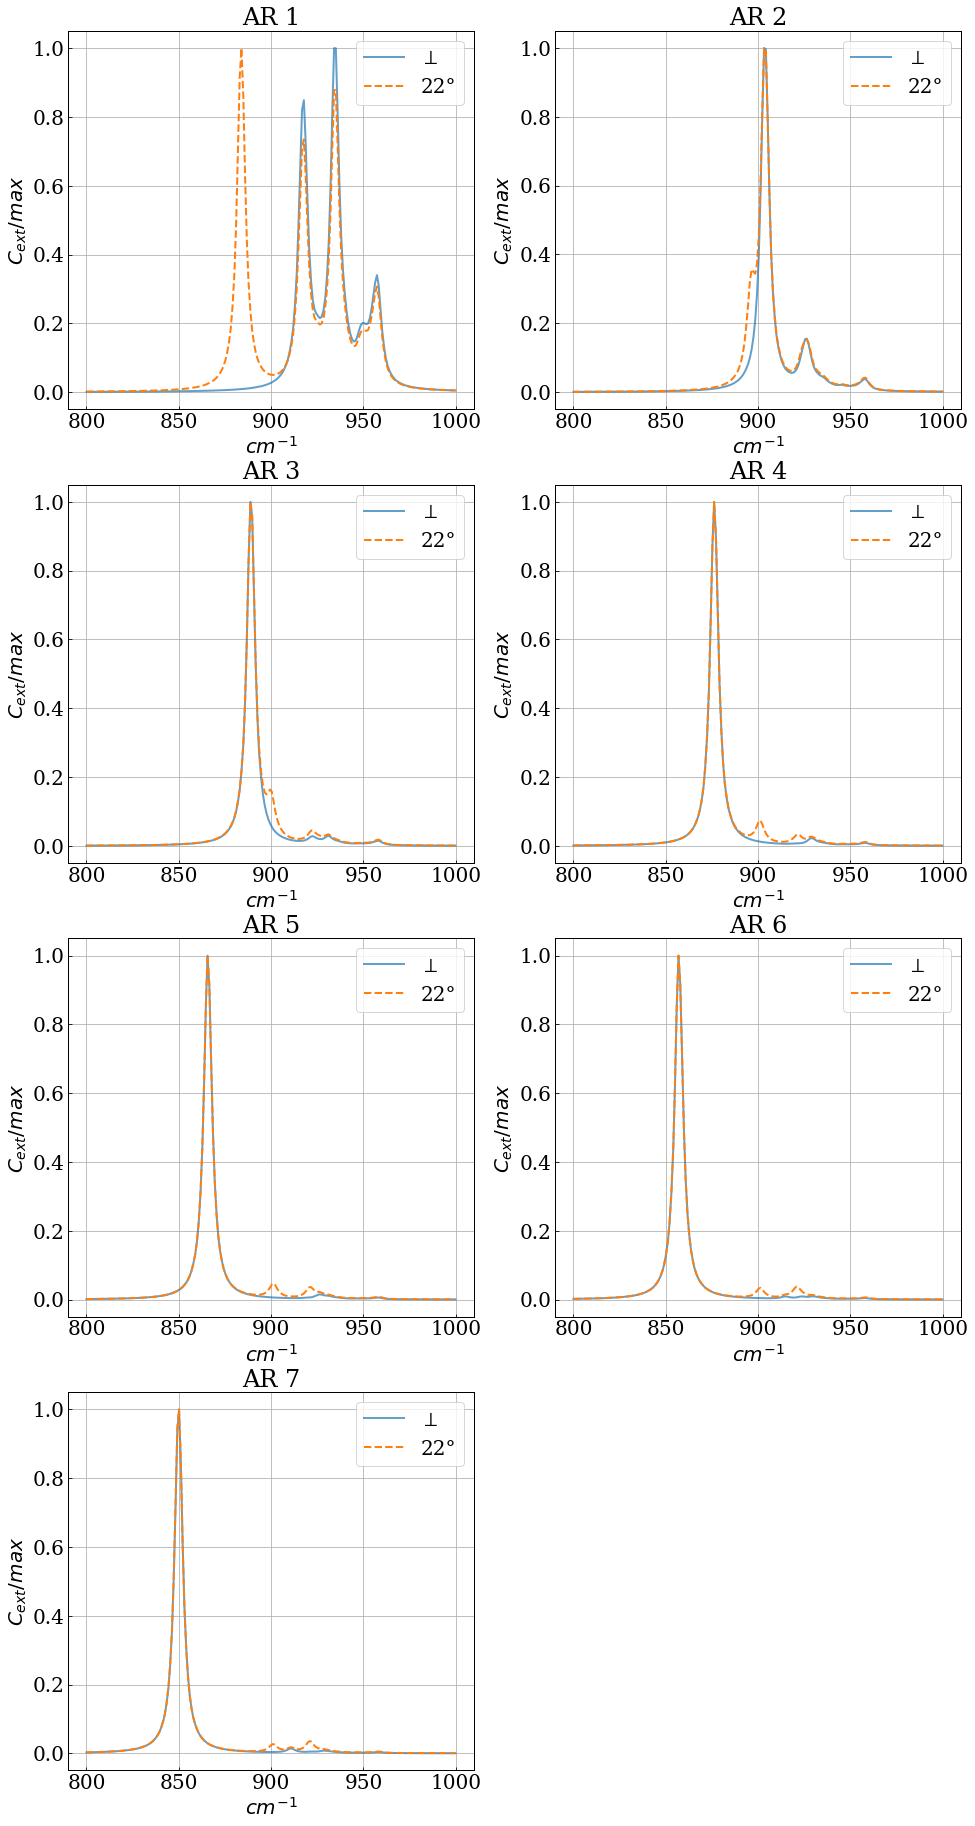

In [4]:
#plots
fig = pyplot.figure(figsize=(16, 32))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, 8):
    ax = fig.add_subplot(4, 2, i)
    ax.set_xticks([800, 850, 900, 950, 1000])
    ax.grid()
    ax.tick_params(direction='in')
    ax.set_xlabel('$cm^{-1}$')
    ax.set_ylabel('$C_{ext}/max$')
    ax.plot(AR_dict[f'AR_{i}']['w'], AR_dict[f'AR_{i}']['cext']/AR_dict[f'AR_{i}']['cext'].max(),
            label='$\perp$', ls='-', alpha=0.7, lw=2)
    ax.plot(AR_22_dict[f'AR_{i}']['w'], AR_22_dict[f'AR_{i}']['cext']/AR_22_dict[f'AR_{i}']['cext'].max(),
            label='22°', ls='--', lw=2)
    ax.legend(loc='best')
    ax.set_title(f'AR {i}')

#fig.savefig('AR_22_vs_zero_b.png', format='png', bbox_inches='tight', pad_inches=0.1)

#fig.savefig('AR_22_vs_zero_notion.png', format='png', bbox_inches='tight', pad_inches=0.1)

fig.savefig('AR_rep_val_figs/AR_22_vs_norm.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

In [5]:
for i in range(1, 8):
    
    print(f'AR {i} peaks at frequency\n')
    print('normal: {}'.format(numpy.around( AR_dict[f'AR_{i}']['w_maxs_cm-1'], decimals=3)) )
    print('22 deg: {}\n'.format(numpy.around( AR_22_dict[f'AR_{i}']['w_maxs_cm-1'], decimals=3)) )


AR 1 peaks at frequency

normal: [917.73  934.092 949.604 957.325]
22 deg: [883.926 917.73  935.052 949.604 957.325]

AR 2 peaks at frequency

normal: [903.233 926.395 944.762 958.242]
22 deg: [896.517 903.233 926.395 944.762 958.242]

AR 3 peaks at frequency

normal: [888.793 922.552 931.223 948.613 958.242]
22 deg: [888.793 899.418 922.552 931.223 958.242]

AR 4 peaks at frequency

normal: [876.186 929.32  946.639 958.242]
22 deg: [876.186 901.281 921.618 929.32  945.745 958.242]

AR 5 peaks at frequency

normal: [865.576 926.395 945.745 958.242]
22 deg: [865.576 901.281 921.618 958.242]

AR 6 peaks at frequency

normal: [856.904 914.793 923.489 929.32  946.639 958.242]
22 deg: [856.904 901.281 920.6   958.242]

AR 7 peaks at frequency

normal: [850.134 910.963 921.618 928.372 946.639 958.242]
22 deg: [850.134 901.281 910.963 920.6   958.242]



In [6]:
numpy.array([ 903.233,  926.395,  944.762,  958.242]) -9.7


array([893.533, 916.695, 935.062, 948.542])

## Get lower modes

In [7]:
lower_modes = [AR_dict[f'AR_{i}']['w_maxs_cm-1'].min() for i in range(1,8)]

In [8]:
numpy.savetxt('AR_lower_modes.txt', 
             list(zip( range(1,8), lower_modes)),
             fmt = '%i %.5f', 
             header = 'AR , lambda [cm^-1]')